In [ ]:
%pip install pywhatkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pywhatkit-5.4-py3-none-any.whl (15 kB)
  Using cached PyAutoGUI-0.9.53.tar.gz (59 kB)
  Preparing metadata (setup.py) ... done
  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyMsgBox-1.0.9.tar.gz (18 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytweening-1.0.5.tar.gz (168 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyScreeze-0.1.28.tar.gz (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  

In [ ]:
%pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install torch torchvision torchaudio
%pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
%pip install git+https://github.com/JaidedAI/EasyOCR.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JaidedAI/EasyOCR.git to /tmp/pip-req-build-dv2mlkfu
  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git /tmp/pip-req-build-dv2mlkfu
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit 5c68ae4b3f273500dbcfeb06832415d8704020d1
  Preparing metadata (setup.py) ... done


In [ ]:
%pip install --upgrade pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import cv2 as cv
import pytesseract
from PIL import Image
from pytesseract import image_to_string
import tensorflow as tf
import keras
import keras.layers as L
import keras.models as M
import os
from keras.utils import Sequence


# # Path of working folder on Disk Replace with your working folder
src_path = "C:\\Users\\<user>\\PycharmProjects\\ImageToText\\input\\"
# # # If you don't have tesseract executable in your PATH, include the 
# # following:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract- OCR/tesseract'
TESSDATA_PREFIX = 'C:/Program Files (x86)/Tesseract-OCR'

# def get_string(img_path):
#     # Read image with opencv
#     img = cv2.imread(img_path)

#     # Convert to gray
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=3)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)
model.save('digits.model')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2232 - accuracy: 0.9328
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0892 - accuracy: 0.9715
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9744
0.974399983882904
0.08573321253061295


In [ ]:
train=pd.read_csv('written_name_train_v2.csv')
validation=pd.read_csv('written_name_validation_v2.csv')

In [ ]:
train.dropna(inplace=True)
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [ ]:
train[train['IDENTITY']=='zucchi']

,FILENAME,IDENTITY
20507,TRAIN_20508.jpg,zucchi


In [ ]:
train['Length']=train['IDENTITY'].apply(lambda x : len(str(x)))
train=train[train['Length']<=21]
train['IDENTITY']=train['IDENTITY'].str.upper()
train[train['Length']==max(train['Length'])]

<ipython-input-23-955a0cf30fa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IDENTITY']=train['IDENTITY'].str.upper()


,FILENAME,IDENTITY,Length
10278,TRAIN_10279.jpg,DOSSANTOS LASCONCELOS,21
108567,TRAIN_108568.jpg,O ZUARRDI EREBEVITRAC,21
156500,TRAIN_156501.jpg,ANDRIANNARISOA--DEGHI,21
160575,TRAIN_160576.jpg,LOUISIANE - EVANGELIN,21
174121,TRAIN_174122.jpg,GU ILLOSSOO - OARRIBA,21
212583,TRAIN_212584.jpg,DE MALEZIEUX DU HAMEL,21
220135,TRAIN_220136.jpg,COSTREL DE CORAINVILL,21
229529,TRAIN_229530.jpg,ROUSSEAV -- CHAUDIERE,21
230011,TRAIN_230012.jpg,BEKNARD DE LAVERNETTE,21
308769,TRAIN_308770.jpg,DATE NAISSANCE CLASSE,21


In [ ]:
train=train.sample(frac=0.8,random_state=42)
validation=validation.sample(frac=0.1)

In [ ]:
characters=set()
train['IDENTITY']=train['IDENTITY'].apply(lambda x: str(x))
for i in train['IDENTITY'].values:
    for j in i :
        if j not in characters :
            characters.add(j)
characters=sorted(characters)

In [ ]:
char_to_label = {char:label for label,char in enumerate(characters)}
label_to_char = {label:char for label,char in enumerate(characters)}
path_train='../input/handwriting-recognition/train_v2/train'
path_validation='../input/handwriting-recognition/validation_v2/validation'

In [ ]:
class DataGenerator(Sequence):
    def __init__(self,dataframe,path,char_map,batch_size=128,img_size=(256,64),
                 downsample_factor=4,max_length=22,shuffle=True):
        self.dataframe=dataframe
        self.path=path
        self.char_map=char_map
        self.batch_size=batch_size
        self.width=img_size[0]
        self.height=img_size[1]
        self.downsample_factor=downsample_factor
        self.max_length=max_length
        self.shuffle=shuffle
        self.indices = np.arange(len(dataframe))
        self.on_epoch_end()
        
    def __len__(self):
        return len(self.dataframe)//self.batch_size
    
    def __getitem__(self,idx):
        curr_batch_idx=self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_images=np.ones((self.batch_size,self.width,self.height,1),dtype=np.float32)
        batch_labels=np.ones((self.batch_size,self.max_length),dtype=np.float32)
        input_length=np.ones((self.batch_size,1),dtype=np.float32)*(self.width//self.downsample_factor-2)
        label_length=np.zeros((self.batch_size,1),dtype=np.int64)
        for i,idx in enumerate(curr_batch_idx):
            img_path=self.dataframe['FILENAME'].values[idx]
            img=cv2.imread(self.path+'/'+img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(self.width,self.height))
            img=(img/255).astype(np.float32)
            img=img.T
            img=np.expand_dims(img,axis=-1)
            text=self.dataframe['IDENTITY'].values[idx]
            text=str(text)
            label=[]
            for j in text: 
                if j in self.char_map :
                    label.append(self.char_map[j])
                else:
                    label.append(100)
            label.extend([100]*(22-len(label)))
            batch_images[i]=img
            batch_labels[i]=label
            label_length[i]=len(label)
        batch_inputs= {
                'input_data':batch_images,
                'input_label':batch_labels,
                'input_length':input_length,
                'label_length':label_length
                
            }
        return batch_inputs,np.zeros((self.batch_size),dtype=np.float32)
    def on_epoch_end(self):
        if self.shuffle == True :
            np.random.shuffle(self.indices)
        

In [ ]:
train_generator=DataGenerator(train,path_train,char_to_label)
validation_generator=DataGenerator(validation,path_validation,char_to_label)

In [ ]:
class CTCLayer(L.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        
        # On test time, just return the computed loss
        return loss

In [ ]:
def make_model():
    inp=L.Input(shape=(256,64,1),dtype=np.float32,name='input_data')
    labels=L.Input(shape=[22],dtype=np.float32,name='input_label')
    input_length=L.Input(shape=[1],dtype=np.int64,name='input_length')
    label_length=L.Input(shape=[1],dtype=np.int64,name='label_length')
    x=L.Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(inp)
    x=L.MaxPooling2D(pool_size=(2,2))(x)
    x=L.Dropout(0.3)(x)
    x=L.Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(x)
    x=L.MaxPooling2D(pool_size=(2,2))(x)
    x=L.Dropout(0.3)(x)
    new_shape=((256//4),(64//4)*128)
    x=L.Reshape(new_shape)(x)
    x=L.Dense(64,activation='relu')(x)
    x=L.Dropout(0.2)(x)
    x=L.Bidirectional(L.LSTM(128,return_sequences=True,dropout=0.2))(x)
    x=L.Bidirectional(L.LSTM(64,return_sequences=True,dropout=0.25))(x)
    x=L.Dense(len(characters)+1,activation='softmax',kernel_initializer='he_normal',name='Dense_output')(x)
    output=CTCLayer(name='outputs')(labels,x,input_length,label_length)
    model=M.Model([inp,labels,input_length,label_length],output)
    # Optimizer
    sgd = keras.optimizers.SGD(learning_rate=0.002,
                               decay=1e-6,
                               momentum=0.9,
                               nesterov=True,
                               clipnorm=5)
    model.compile(optimizer=sgd)
    return model

In [ ]:
model=make_model()
model.summary()
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   restore_best_weights=True)

# Train the model
if 'prediction_model_ocr.h5' not in os.listdir('./'):
    history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
                        epochs=8)
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='Dense_output').output)
prediction_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_data (InputLayer)        [(None, 256, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 256, 64, 64)  640         ['input_data[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 128, 32, 64)  0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 128, 32, 64)  0           ['max_pooling2d[0][0]']      

In [ ]:
if 'prediction_model_ocr.h5' not in os.listdir('./'):
    prediction_model.save('prediction_model_ocr.h5')
    prediction_model=M.load_model('prediction_model_ocr.h5')
label_to_char[100]=''

In [ ]:
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    
    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += label_to_char[c]
        output_text.append(outstr)
    
    # return final text results
    return output_text
for p, (inp_value, _) in enumerate(validation_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']
    plt.imshow(X_data[0])
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)
    
    
    orig_texts = []
    for label in labels:
        text = ''.join([label_to_char[int(x)] for x in label])
        orig_texts.append(text)
        
    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
    break

In [ ]:
batch_images=np.ones((128,256,64,1),dtype=np.float32)
img=cv2.imread('../input/handwriting-recognition/test_v2/test/TEST_0004.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(256,64))
img=(img/255).astype(np.float32)
img=img.T
img=np.expand_dims(img,axis=-1)
batch_images[0]=img
x=prediction_model.predict(batch_images)
pred_texts = decode_batch_predictions(x)
pred_texts = pred_texts[0]
im=cv2.imread('../input/handwriting-recognition/test_v2/test/TEST_0004.jpg')
plt.imshow(im)
print('Predicted Text:',pred_texts)

In [ ]:
IMAGE_PATH = 'image-4.jpeg'

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[146, 293], [719, 293], [719, 522], [146, 522]],
  'Abcd+',
  0.9972994223042557)]

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv.FONT_HERSHEY_SIMPLEX

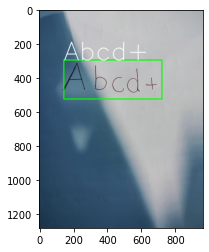

In [ ]:
img = cv.imread(IMAGE_PATH)
img = cv.rectangle(img, top_left, bottom_right, (0,255,0),5)
img = cv.putText(img, text, top_left, font, 5, (255,255,255),3, cv.LINE_AA)
plt.imshow(img)
plt.show()

In [ ]:

# Read image with opencv
img = cv.imread(IMAGE_PATH)

#     # Convert to gray
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

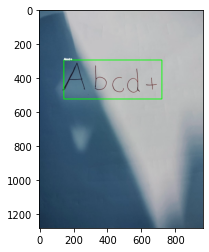

In [ ]:
img = cv.imread(IMAGE_PATH)
img = cv.rectangle(img, top_left, bottom_right, (0,550,0),4)
img = cv.putText(img, text, top_left, font, .5, (550,550,550),2, cv.LINE_AA)
plt.imshow(img)
plt.show()

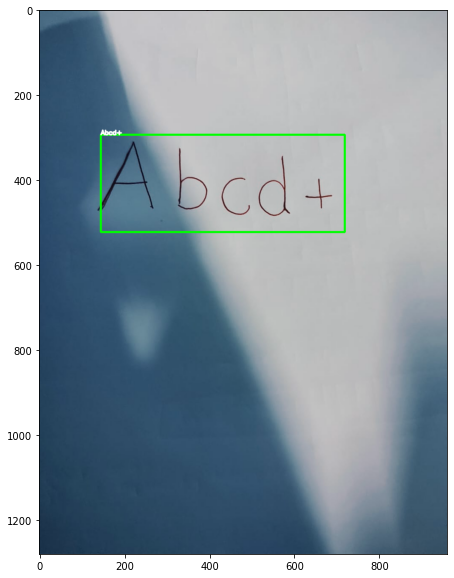

In [ ]:
img = cv.imread(IMAGE_PATH)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font =cv.FONT_HERSHEY_SIMPLEX
  img = cv.rectangle(img, top_left, bottom_right, (0,255,0),4)
  img = cv.putText(img, text, top_left, font, .5, (255,255,255),2, cv.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
%pip install parrot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install git+https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git to /tmp/pip-req-build-doqg68oa
  Running command git clone --filter=blob:none --quiet https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git /tmp/pip-req-build-doqg68oa
  Resolved https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git to commit 720a87a1ee557d8ed8d9a021adbdd1dd5616c5f9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19

In [ ]:
from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")

''' 
uncomment to get reproducable paraphrase generations
def random_state(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

random_state(1234)
'''

#Init models (make sure you init ONLY once if you integrate this to your code)
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5")

phrases = ["why do you think she is sad?",
           "She don't need a reason to be sad"
]

for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase, use_gpu=False)
  for para_phrase in para_phrases:
   print(para_phrase)

----------------------------------------------------------------------------------------------------
Input_phrase:  why do you thinnk she is sad?
----------------------------------------------------------------------------------------------------
("why do you think she's sad?", 15)
----------------------------------------------------------------------------------------------------
Input_phrase:  She don't need a reason to be sad
----------------------------------------------------------------------------------------------------
("she doesn't need to have a reason to be sad", 22)


In [ ]:
import pywhatkit as kit
import cv2
kit.text_to_handwriting("Hope you are doing well", save_to="handwriting.png")
img = cv2.imread("handwriting.png")
cv2.imshow("Text to Handwriting", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Importing Library
from PIL import Image
#Open the text file which you have to convert into handwriting
txt=open(“dummy.txt”) # path of your text file
#path of page(background)photo (I have used blank page)
BG=Image.open(“myfont/bg.png”) 
sheet_width=BG.width
gap, ht = 0, 0

for i in txt.read().replace(“\n”,””):
    cases = Image.open(“myfont/{}.png”.format(str(ord(i))))
    BG.paste(cases, (gap, ht))
    size = cases.width
    height=cases.height
    #print(size)
    gap+=size
    if sheet_width < gap or len(i)*115 >(sheet_width-gap):
        gap,ht=0,ht+140
print(gap)
print(sheet_width)
BG.show()